In [1]:
import pylab
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, poisson
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("report_pea11.csv")
df

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,1,Male,Number,28374
1,Population estimates from 1926,1926,1,Female,Number,27502
2,Population estimates from 1926,1926,2,Male,Number,29728
3,Population estimates from 1926,1926,2,Female,Number,28545
4,Population estimates from 1926,1926,3,Male,Number,29872
...,...,...,...,...,...,...
7717,Population estimates from 1926,2023,97,Female,Number,821
7718,Population estimates from 1926,2023,98,Male,Number,197
7719,Population estimates from 1926,2023,98,Female,Number,632
7720,Population estimates from 1926,2023,99,Male,Number,352


In [3]:
#shows only column names
print(df.columns)

Index(['STATISTIC Label', 'Year', 'Single Year of Age', 'Sex', 'UNIT',
       'VALUE'],
      dtype='object')


In [4]:
#information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STATISTIC Label     7722 non-null   object
 1   Year                7722 non-null   int64 
 2   Single Year of Age  7722 non-null   int64 
 3   Sex                 7722 non-null   object
 4   UNIT                7722 non-null   object
 5   VALUE               7722 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 362.1+ KB


In [5]:
#display rows of the data set
df.head()

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,1,Male,Number,28374
1,Population estimates from 1926,1926,1,Female,Number,27502
2,Population estimates from 1926,1926,2,Male,Number,29728
3,Population estimates from 1926,1926,2,Female,Number,28545
4,Population estimates from 1926,1926,3,Male,Number,29872


In [6]:
#calculate missing values
missing_values_count = df.isnull().sum()
missing_values_count

STATISTIC Label       0
Year                  0
Single Year of Age    0
Sex                   0
UNIT                  0
VALUE                 0
dtype: int64

In [7]:
#basic statistical summaries
df.describe()

,Year,Single Year of Age,VALUE
count,7722.000000,7722.000000,7722.000000
mean,1996.410256,50.000000,20165.280238
std,24.463714,28.579231,11916.506392
min,1926.000000,1.000000,6.000000
25%,1986.000000,25.000000,10447.000000
50%,2004.000000,50.000000,22713.500000
75%,2014.000000,75.000000,30166.500000
max,2023.000000,99.000000,44954.000000


In [8]:
mode_df = df['VALUE'].mode()
mode_df 

0    69
Name: VALUE, dtype: int64

In [9]:
mean_df = df['VALUE'].mean()
mean_df

20165.280238280237

In [10]:
df.nunique()

STATISTIC Label          1
Year                    39
Single Year of Age      99
Sex                      2
UNIT                     1
VALUE                 6859
dtype: int64

In [11]:
# Calculate the median (50th percentile)
median = df['VALUE'].quantile(0.5)

# Calculate the 1st quartile (25th percentile)
q1 = df['VALUE'].quantile(0.25)

# Calculate the 3rd quartile (75th percentile)
q3 = df['VALUE'].quantile(0.75)

# You can calculate other quantiles similarly, by specifying the desired percentile as a decimal.

print("Median:", median)
print("1st Quartile (25th percentile):", q1)
print("3rd Quartile (75th percentile):", q3)

missing_values = df['VALUE'].isnull().sum()
print("Number of missing values in 'VALUE' column:", missing_values)

Median: 22713.5
1st Quartile (25th percentile): 10447.0
3rd Quartile (75th percentile): 30166.5
Number of missing values in 'VALUE' column: 0


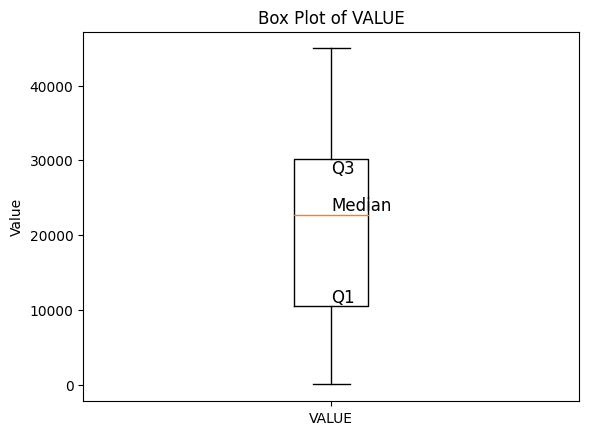

In [12]:
# Create a box plot for the 'VALUE' column
plt.boxplot(df['VALUE'])

# Add labels to the quartiles
plt.text(1, q1, 'Q1', fontsize=12, verticalalignment='bottom')
plt.text(1, median, 'Median', fontsize=12, verticalalignment='bottom')
plt.text(1, q3, 'Q3', fontsize=12, verticalalignment='top')

# Customize the plot (optional)
plt.title('Box Plot of VALUE')
plt.ylabel('Value')
plt.xticks([1], ['VALUE'])

# Show the plot
plt.show()


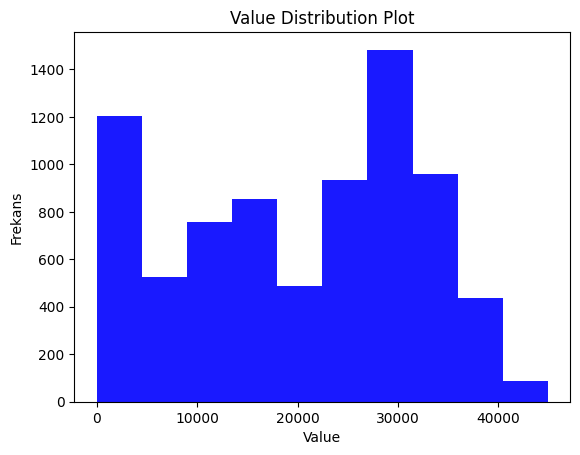

In [13]:
#Scatter Plot of Value
value = df['VALUE']

# Histogram plot
plt.hist(value, bins=10, color='blue', alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Frekans')
plt.title('Value Distribution Plot')
plt.show()

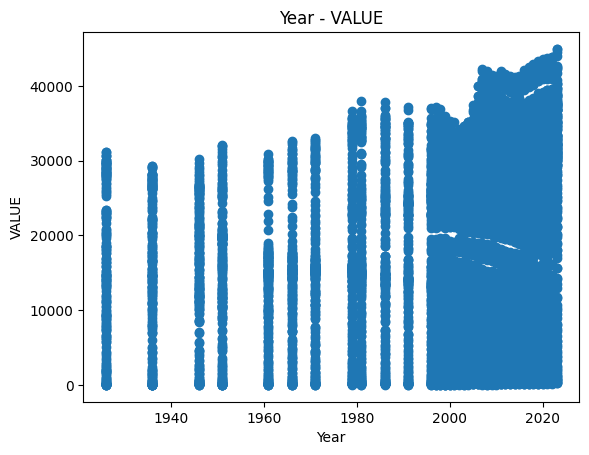

In [14]:
#Scatter plot
plt.scatter(df.Year,df.VALUE)
plt.title("Year - VALUE")
plt.xlabel("Year")
plt.ylabel("VALUE")
plt.show()

In [15]:
df_binom_poisson=df
df_binom_poisson

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,1,Male,Number,28374
1,Population estimates from 1926,1926,1,Female,Number,27502
2,Population estimates from 1926,1926,2,Male,Number,29728
3,Population estimates from 1926,1926,2,Female,Number,28545
4,Population estimates from 1926,1926,3,Male,Number,29872
...,...,...,...,...,...,...
7717,Population estimates from 1926,2023,97,Female,Number,821
7718,Population estimates from 1926,2023,98,Male,Number,197
7719,Population estimates from 1926,2023,98,Female,Number,632
7720,Population estimates from 1926,2023,99,Male,Number,352


In [16]:
#skewness and kurtosis
print("Skewness: %f" % df['VALUE'].skew())
print("Kurtosis: %f" % df['VALUE'].kurt())

Skewness: -0.243637
Kurtosis: -1.185861


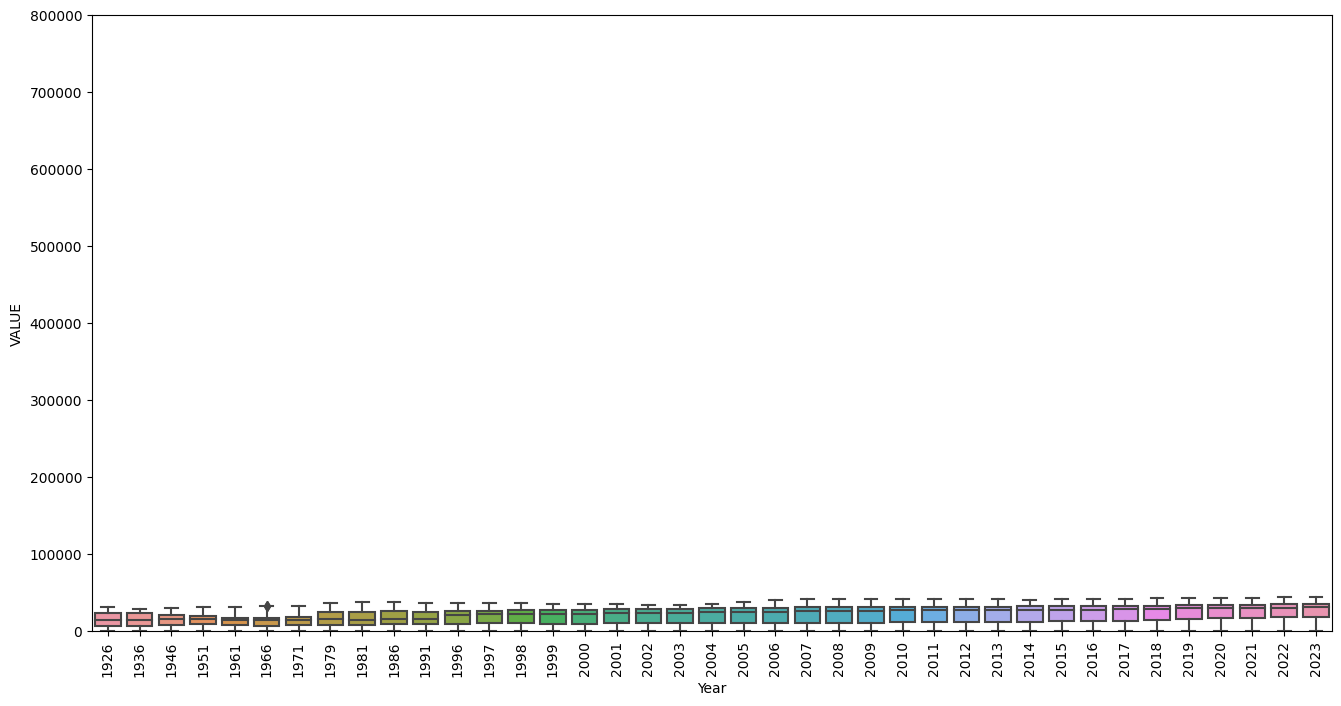

In [17]:
## year - value box plot
var = 'Year'
data = pd.concat([df['VALUE'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="VALUE", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Binom - Poission

In [18]:
# Example of binomial distribution
n = 10000 # Number of attempts
p = 0.5 # Probability of success
binom_df = binom.rvs(n, p, size=len(data))
binom_df

array([5049, 5113, 5067, ..., 4975, 5009, 5004], dtype=int64)

In [19]:
# Poisson distribution example
lambda_=10000 # Average number of events
poisson_df = poisson.rvs(lambda_, size=len(data))
poisson_df

array([ 9818, 10050,  9895, ..., 10004,  9794,  9886], dtype=int64)

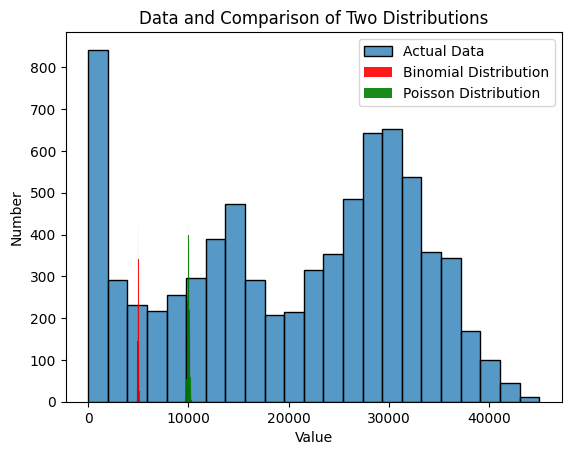

In [20]:
# Visualize and compare data
sns.histplot(df_binom_poisson['VALUE'], label='Actual Data')
sns.histplot(binom_df, label='Binomial Distribution', color='red', alpha=0.9)
sns.histplot(poisson_df, label='Poisson Distribution', color='green', alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Number')
plt.title('Data and Comparison of Two Distributions')
plt.legend()
plt.show()

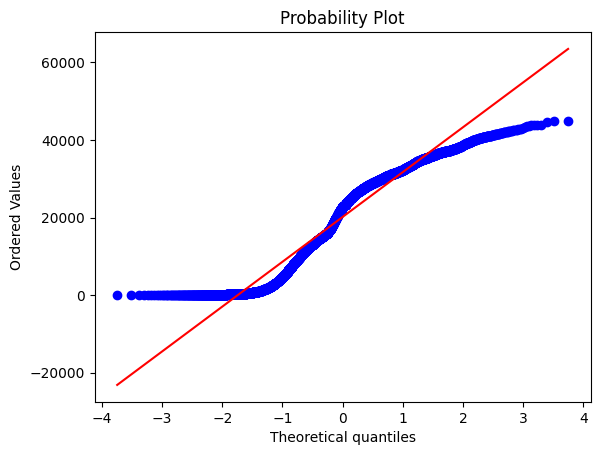

In [21]:
#Normal Distribution Compliance Examination
sorted_data = np.sort(df_binom_poisson['VALUE'])
norm_quantiles = stats.probplot(sorted_data , dist="norm", plot=pylab)
pylab.show()

In [22]:
df

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,1,Male,Number,28374
1,Population estimates from 1926,1926,1,Female,Number,27502
2,Population estimates from 1926,1926,2,Male,Number,29728
3,Population estimates from 1926,1926,2,Female,Number,28545
4,Population estimates from 1926,1926,3,Male,Number,29872
...,...,...,...,...,...,...
7717,Population estimates from 1926,2023,97,Female,Number,821
7718,Population estimates from 1926,2023,98,Male,Number,197
7719,Population estimates from 1926,2023,98,Female,Number,632
7720,Population estimates from 1926,2023,99,Male,Number,352


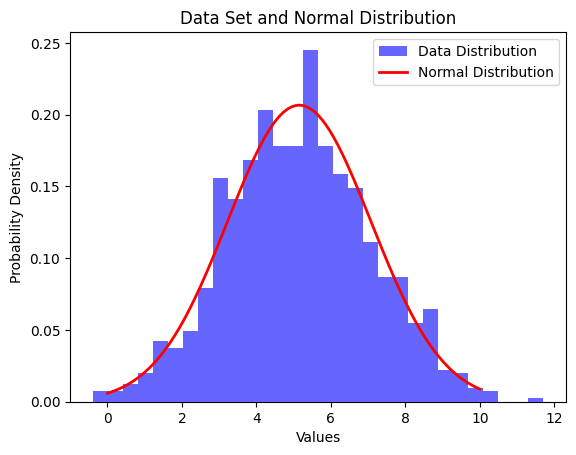

In [23]:
# Load or create your dataset (data)
# As an example, let's use a random Normal distribution
df_binom_poisson = np.random.normal(loc=5, scale=2, size=1000) # Mean=5, Standard Deviation=2, Number of Samples=1000

# Calculate statistics for the data
mean = np.mean(df_binom_poisson)
standard_deviation = np.std(df_binom_poisson)

# Visualize data
plt.hist(df_binom_poisson, bins=30, density=True, alpha=0.6, color='b', label='Data Distribution')

# Calculate the probability density function of the normal distribution
x = np.linspace(0, 10, 100)
pdf = norm.pdf(x, mean, standard_deviation)
plt.plot(x, pdf, 'r', lw=2, label='Normal Distribution')

plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Data Set and Normal Distribution')
plt.legend()

plt.show()

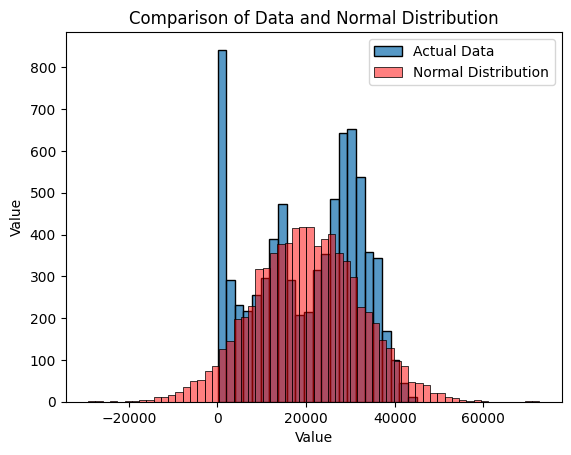

In [24]:
# Compare data to a standard normal distribution
mean = df['VALUE'].mean()
std_dev = df['VALUE'].std()
norm_data = norm.rvs(loc=mean, scale=std_dev, size=len(df))

# Visualize and compare data
sns.histplot(df['VALUE'], label='Actual Data')
sns.histplot(norm_data, label='Normal Distribution', color='red', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Value')
plt.title('Comparison of Data and Normal Distribution')
plt.legend()
plt.show()

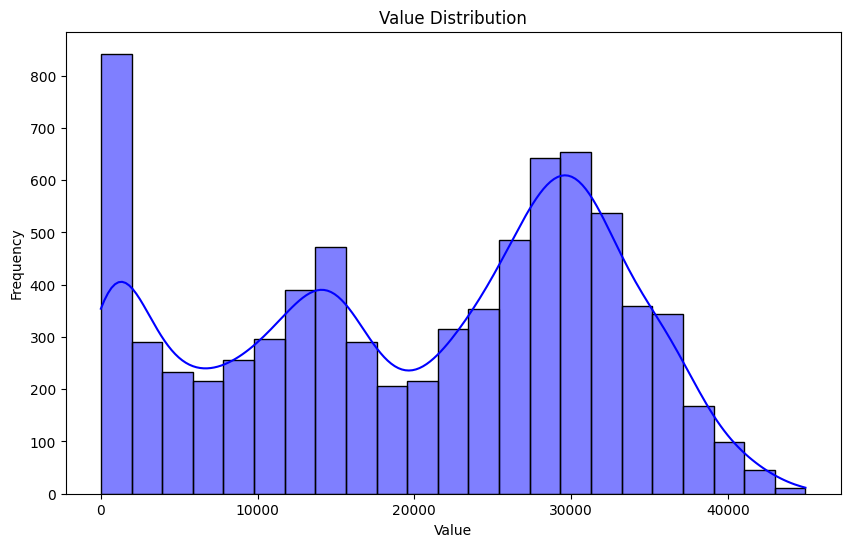

In [25]:
#Value distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['VALUE'], kde=True, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Value Distribution')
plt.show()

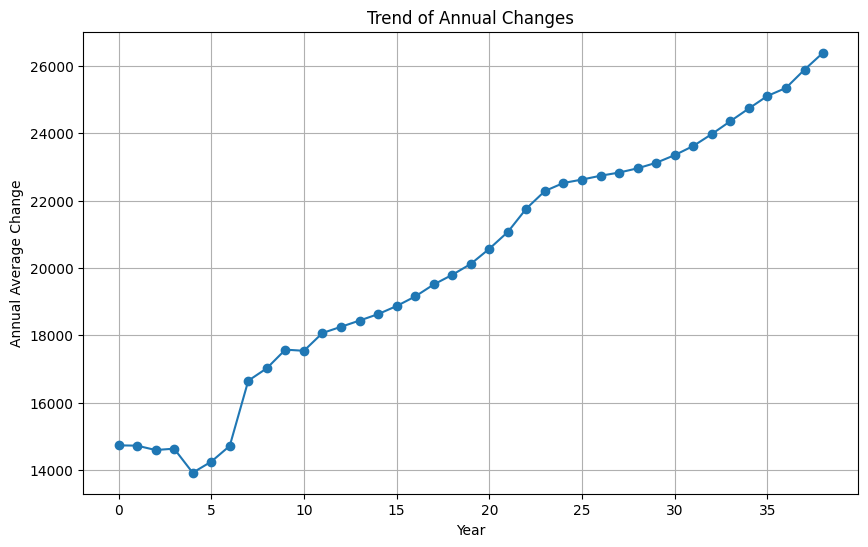

In [26]:
#Trend analysis

# Group data by years and calculate annual average changes
annual_average = df.groupby("Year")["VALUE"].mean()

# Convert annual average changes to an array
annual_average = annual_average.values

# Plot the annual average changes
plt.figure(figsize=(10, 6))
plt.plot(annual_average, marker='o', linestyle='-')
plt.title("Trend of Annual Changes")
plt.xlabel("Year")
plt.ylabel("Annual Average Change")
plt.grid(True)
plt.show()

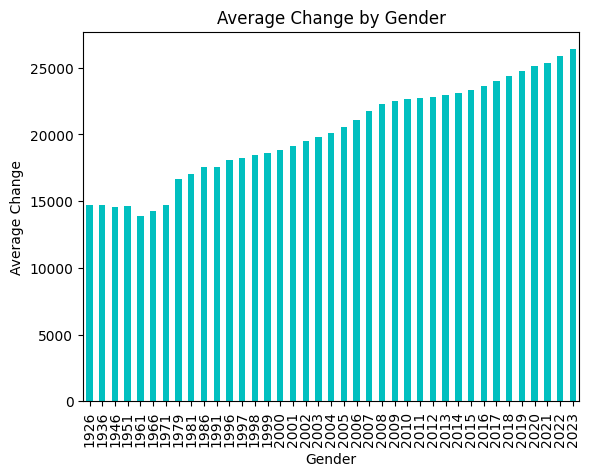

In [27]:
#Year-Sex Plot
data_group = df.groupby("Year")["VALUE"].mean()
data_group.plot(kind='bar', color='c')
plt.title("Average Change by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Change")
plt.show()

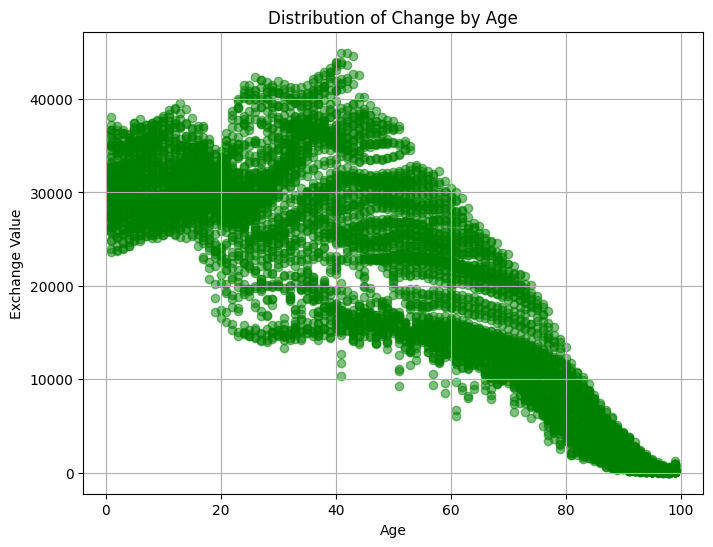

In [28]:
#Single Year of Age- Value distribution
plt.figure(figsize=(8, 6))
plt.scatter(df["Single Year of Age"], df["VALUE"], color='g', alpha=0.5)
plt.title("Distribution of Change by Age")
plt.xlabel("Age")
plt.ylabel("Exchange Value")
plt.grid(True)
plt.show()

## correlation

In [30]:
df

,STATISTIC Label,Year,Single Year of Age,Sex,UNIT,VALUE
0,Population estimates from 1926,1926,1,Male,Number,28374
1,Population estimates from 1926,1926,1,Female,Number,27502
2,Population estimates from 1926,1926,2,Male,Number,29728
3,Population estimates from 1926,1926,2,Female,Number,28545
4,Population estimates from 1926,1926,3,Male,Number,29872
...,...,...,...,...,...,...
7717,Population estimates from 1926,2023,97,Female,Number,821
7718,Population estimates from 1926,2023,98,Male,Number,197
7719,Population estimates from 1926,2023,98,Female,Number,632
7720,Population estimates from 1926,2023,99,Male,Number,352


In [31]:
# Choose Using features
df = df[['Year', 'Single Year of Age', 'Sex', 'VALUE']]
df

,Year,Single Year of Age,Sex,VALUE
0,1926,1,Male,28374
1,1926,1,Female,27502
2,1926,2,Male,29728
3,1926,2,Female,28545
4,1926,3,Male,29872
...,...,...,...,...
7717,2023,97,Female,821
7718,2023,98,Male,197
7719,2023,98,Female,632
7720,2023,99,Male,352


In [32]:
##Converting a variable into an integer
df['New_sex'] = df['Sex'].map({'Male': 0, 'Female': 1 })
df

C:\Users\omer_\AppData\Local\Temp\ipykernel_1808\948926414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['New_sex'] = df['Sex'].map({'Male': 0, 'Female': 1 })


,Year,Single Year of Age,Sex,VALUE,New_sex
0,1926,1,Male,28374,0
1,1926,1,Female,27502,1
2,1926,2,Male,29728,0
3,1926,2,Female,28545,1
4,1926,3,Male,29872,0
...,...,...,...,...,...
7717,2023,97,Female,821,1
7718,2023,98,Male,197,0
7719,2023,98,Female,632,1
7720,2023,99,Male,352,0


In [33]:
# Choose Using features
df_new = df[['Year', 'Single Year of Age', 'VALUE', 'New_sex']]
df_new

,Year,Single Year of Age,VALUE,New_sex
0,1926,1,28374,0
1,1926,1,27502,1
2,1926,2,29728,0
3,1926,2,28545,1
4,1926,3,29872,0
...,...,...,...,...
7717,2023,97,821,1
7718,2023,98,197,0
7719,2023,98,632,1
7720,2023,99,352,0


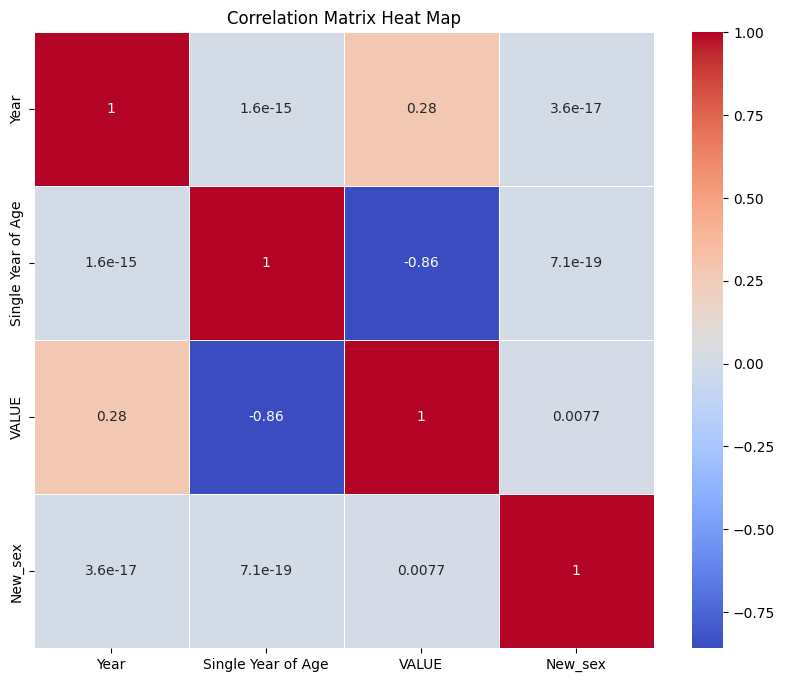

In [34]:
#Correlation Matrix
correlation_matrix = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heat Map')
plt.show()

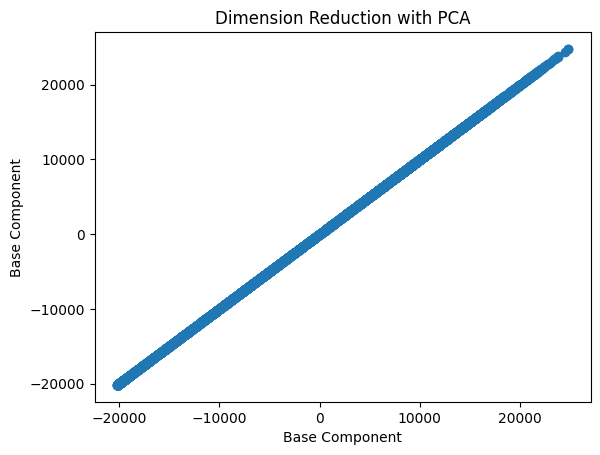

In [35]:
# Get variable "value"
X = df['VALUE'].values.reshape(-1, 1) # Convert data to 2D array

# Build the PCA model
pca = PCA(n_components=1) # Get a principal component (compatible with data size)

# Apply the data to PCA and get the principal component in the new space
X_pca = pca.fit_transform(X)

# Visualize the data to examine the resulting component
plt.scatter(X_pca, X_pca) # We display one-dimensional data in one dimension
plt.xlabel('Base Component')
plt.ylabel('Base Component')
plt.title('Dimension Reduction with PCA')
plt.show()

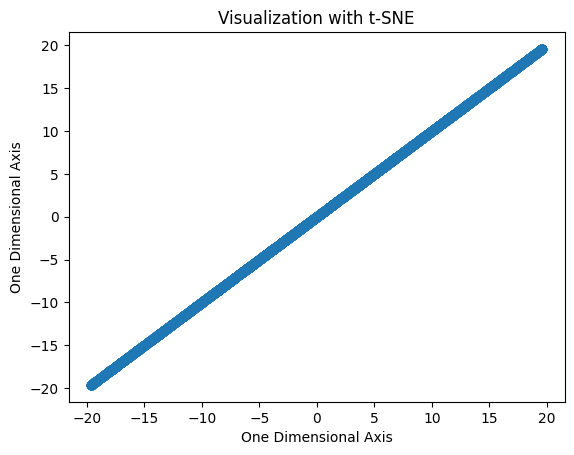

In [36]:
# Get variable "value"
X = df['VALUE'].values.reshape(-1, 1) # Convert data to 2D array

# Create the t-SNE model
tsne = TSNE(n_components=1, perplexity=30, n_iter=300) # Reduce to single dimension

# Apply data to t-SNE and get data in new space
X_tsne = tsne.fit_transform(X)

# Create a visualization to examine the resulting data
plt.scatter(X_tsne, X_tsne) # We display one-dimensional data in one dimension
plt.xlabel('One Dimensional Axis')
plt.ylabel('One Dimensional Axis')
plt.title('Visualization with t-SNE')
plt.show()


Random Forest RMSE: 650.3873204375641
Gradient Boosting RMSE: 1800.1414815015905


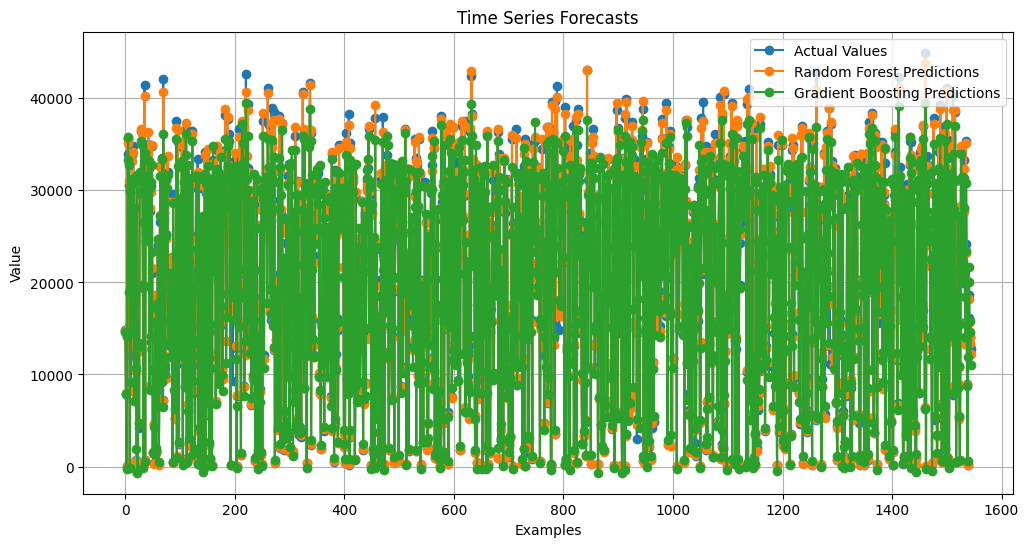

In [37]:
# Select dependent variable and independent variables
X = df_new[["Year", "Single Year of Age", "New_sex"]]
Y = df_new["VALUE"]

# Let's split the data into training and testing data
X_egitim, X_test, Y_egitim, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_egitim, Y_egitim)

# Build and train Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_egitim, Y_egitim)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Calculate RMSE values
rf_rmse = mean_squared_error(Y_test, rf_predictions, squared=False)
gb_rmse = mean_squared_error(Y_test, gb_predictions, squared=False)

# Print the results
print("Random Forest RMSE:", rf_rmse)
print("Gradient Boosting RMSE:", gb_rmse)

# Visualize predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label="Actual Values", marker='o')
plt.plot(rf_predictions, label="Random Forest Predictions", marker='o')
plt.plot(gb_predictions, label="Gradient Boosting Predictions", marker='o')
plt.title("Time Series Forecasts")
plt.xlabel("Examples")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


# Lineer(Doğrusal) Regresyon Analizi

In [38]:
#Linear Regression
x = df[["Year", "Single Year of Age", "New_sex"]] # independent variable
y_real = Y = df["VALUE"] # dependent variable (target, dependent variable)
# Adding the constant
x = sm.add_constant(x)
# Running the model
model = sm.OLS(y_real,x).fit()
# Table where the model will be interpreted
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:27:06   Log-Likelihood:                -76909.
No. Observations:                7722   AIC:                         1.538e+05
Df Residuals:                    7718   BIC:                         1.539e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.325e+05   4757

In [39]:
print(df_new.columns)

Index(['Year', 'Single Year of Age', 'VALUE', 'New_sex'], dtype='object')


In [40]:
df_new


,Year,Single Year of Age,VALUE,New_sex
0,1926,1,28374,0
1,1926,1,27502,1
2,1926,2,29728,0
3,1926,2,28545,1
4,1926,3,29872,0
...,...,...,...,...
7717,2023,97,821,1
7718,2023,98,197,0
7719,2023,98,632,1
7720,2023,99,352,0


In [41]:
# Assign arguments to x, target variable to y
d_variable = ["Year", "Single Year of Age", "New_sex", ]
X = df_new.drop(d_variable, axis=1)
y = df["VALUE"]

# Separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
X_train

,VALUE
4290,13992
1210,30057
1940,4332
6202,35835
6232,31268
...,...
5226,35284
5390,27882
860,15428
7603,43979


In [43]:
X_test

,VALUE
4288,14786
2337,7907
2966,27
1103,14190
6953,35559
...,...
1867,18621
1672,16153
303,13133
1894,14039


In [44]:
#Multivariate Regression:

# Select dependent variable and independent variables
X = df_new[["Year", "Single Year of Age", "New_sex"]]
Y = df_new["VALUE"]

# Let's split the data into training and testing data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build and train Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_training, Y_training)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(Y_test, predictions)
print("Mean Square Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("Root Mean Square Error (RMSE):", rmse)

Mean Square Error (MSE): 423003.6665859547
Root Mean Square Error (RMSE): 650.3873204375641


In [45]:
# Select dependent variable and independent variables
X = df_new[["Year", "Single Year of Age", "New_sex"]]
Y = df_new["VALUE"]

# Let's split the data into training and testing data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build and train XGBoost Regression model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X_training, Y_training)

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(Y_test, predictions)
print("Mean Square Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("Root Mean Square Error (RMSE):", rmse)

Mean Square Error (MSE): 378885.5504807435
Root Mean Square Error (RMSE): 615.5367986406203


In [46]:
#NeuralNetworks

# Select dependent variable and independent variables
X = df_new[["Year", "Single Year of Age", "New_sex"]]
Y = df_new["VALUE"]

# Let's split the data into training and testing data
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Artificial Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_training, Y_training, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Make predictions
predictions = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(Y_test, predictions)
print("Mean Square Error (MSE):", mse)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print("Root Mean Square Error (RMSE):", rmse)

Epoch 1/100
194/194 [==============================] - 2s 6ms/step - loss: 308832160.0000 - val_loss: 137346320.0000
Epoch 2/100
194/194 [==============================] - 1s 4ms/step - loss: 140315536.0000 - val_loss: 132355328.0000
Epoch 3/100
194/194 [==============================] - 1s 4ms/step - loss: 135590720.0000 - val_loss: 128088512.0000
Epoch 4/100
194/194 [==============================] - 1s 4ms/step - loss: 130841696.0000 - val_loss: 122894832.0000
Epoch 5/100
194/194 [==============================] - 1s 4ms/step - loss: 125156784.0000 - val_loss: 116732928.0000
Epoch 6/100
194/194 [==============================] - 1s 3ms/step - loss: 117522016.0000 - val_loss: 107703304.0000
Epoch 7/100
194/194 [==============================] - 1s 4ms/step - loss: 106323080.0000 - val_loss: 94499304.0000
Epoch 8/100
194/194 [==============================] - 1s 4ms/step - loss: 89414888.0000 - val_loss: 74300896.0000
Epoch 9/100
194/194 [==============================] - 1s 3ms/step 